In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create a set of random latitude and longitude combinations

lats = np.random.uniform(low = 90.000, high= 90.000, size =50000)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 50000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# add the latitudes and longitudes to a list

coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

28

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tasiilaq
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | longyearbyen
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | berlevag
Processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 11 of Set 1 | chokurdakh
Processing Record 12 of Set 1 | tuktoyaktuk
Processing Record 13 of Set 1 | vardo
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | nizhneyansk
City not fo

In [10]:
len(city_data)

21

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tasiilaq,65.6145,-37.6368,26.76,96,94,5.30,GL,2022-04-03 20:47:35
1,Pevek,69.7008,170.3133,-16.74,96,24,2.10,RU,2022-04-03 20:51:25
2,Qaanaaq,77.4840,-69.3632,13.96,74,88,6.38,GL,2022-04-03 20:48:00
3,Khatanga,71.9667,102.5000,-31.04,100,99,3.47,RU,2022-04-03 20:51:26
4,Longyearbyen,78.2186,15.6401,8.44,56,20,21.85,SJ,2022-04-03 20:51:26
5,Dikson,73.5069,80.5464,-3.14,99,39,9.17,RU,2022-04-03 20:47:27
6,Barrow,71.2906,-156.7887,-7.58,77,40,16.11,US,2022-04-03 20:51:27
7,Berlevag,70.8578,29.0864,28.35,54,75,14.97,NO,2022-04-03 20:51:27
8,Chokurdakh,70.6333,147.9167,-19.62,100,79,2.51,RU,2022-04-03 20:51:28
9,Tuktoyaktuk,69.4541,-133.0374,-20.20,76,0,3.44,CA,2022-04-03 20:51:28


In [12]:
# rearrange df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tasiilaq,GL,2022-04-03 20:47:35,65.6145,-37.6368,26.76,96,94,5.30
1,Pevek,RU,2022-04-03 20:51:25,69.7008,170.3133,-16.74,96,24,2.10
2,Qaanaaq,GL,2022-04-03 20:48:00,77.4840,-69.3632,13.96,74,88,6.38
3,Khatanga,RU,2022-04-03 20:51:26,71.9667,102.5000,-31.04,100,99,3.47
4,Longyearbyen,SJ,2022-04-03 20:51:26,78.2186,15.6401,8.44,56,20,21.85
5,Dikson,RU,2022-04-03 20:47:27,73.5069,80.5464,-3.14,99,39,9.17
6,Barrow,US,2022-04-03 20:51:27,71.2906,-156.7887,-7.58,77,40,16.11
7,Berlevag,NO,2022-04-03 20:51:27,70.8578,29.0864,28.35,54,75,14.97
8,Chokurdakh,RU,2022-04-03 20:51:28,70.6333,147.9167,-19.62,100,79,2.51
9,Tuktoyaktuk,CA,2022-04-03 20:51:28,69.4541,-133.0374,-20.20,76,0,3.44


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# 6.3.1 Plot Latitude vs Temperature! 

In [15]:
# Import time module
import time


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

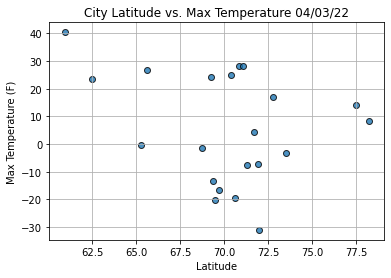

In [24]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

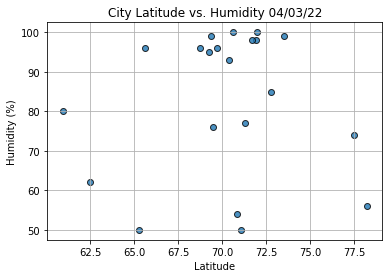

In [25]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

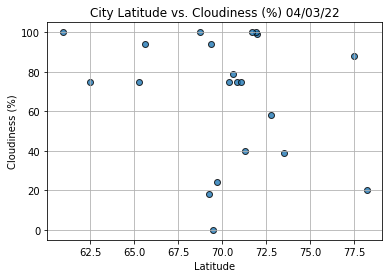

In [26]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

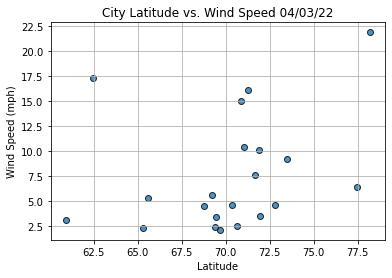

In [27]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()